In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from matplotlib.pyplot import figure
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Comparação de Métricas SGD, Naive Bayes e Logistic Regression 

### Classificadores

In [2]:
# SGD
sgd = SGDClassifier(random_state=42)
# Logistic REgression
lr = LogisticRegression(max_iter=3000, solver='lbfgs')
# Naive Bayes
nb = GaussianNB()

### Dicionário de resultados (precision, recall e fscore)

In [3]:
sgd_info = {'prec':list(), 'recall':list(), 'fscore':list()}
lr_info = {'prec':list(),'recall':list(), 'fscore':list()}
nb_info = {'prec':list(),'recall':list(), 'fscore':list()}

### Stratified K-Folds cross-validator

 Amostragens de teste e treino balanceadas

In [4]:
K = 10

In [5]:
skf = StratifiedKFold(n_splits=K, shuffle=True)
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

In [6]:
def teste_resultados(X_train, X_test, y_train, y_test, model_name, model, model_dict):
    
    mdict = None
    mtrained = None
    
    if model_name == "sgd":
        mtrained = model.fit(X_train, y_train)
        mdict = model_dict
        
    elif model_name == "lr":
        mtrained = model.fit(X_train, y_train)
        mdict = model_dict
        
    elif model_name == "nb":
        mtrained = model.fit(X_train, y_train)
        mdict = model_dict
        
        
    mpred = mtrained.predict(X_test)    
    report = classification_report(y_test, mpred, output_dict=True)
    mdict["prec"].append(report["macro avg"]["precision"])
    mdict["recall"].append(report["macro avg"]["recall"])
    mdict["fscore"].append(report["macro avg"]["f1-score"])

## SA Heart

In [7]:
df1 = pd.read_csv("./../SAheart.data", sep=',') 
df1.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [8]:
le = preprocessing.LabelEncoder()
df1.famhist = le.fit_transform(df1.famhist)
df1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [9]:
X = df1.drop(["chd"],axis=1)
y = df1["chd"]

In [10]:
for train_ind, test_ind in skf.split(X, y):
    X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
    y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]
    
    teste_resultados(X_train, X_test, y_train, y_test, 'sgd', sgd, sgd_info)
    teste_resultados(X_train, X_test, y_train, y_test, 'lr', lr, lr_info)
    teste_resultados(X_train, X_test, y_train, y_test, 'nb', nb, nb_info)

/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Média dos resultados dos folds 

In [11]:
# prec, recall, fscore
sgd_res = [np.mean(sgd_info['prec']), np.mean(sgd_info['recall']), np.mean(sgd_info['fscore'])]
lr_res = [np.mean(lr_info['prec']), np.mean(lr_info['recall']), np.mean(lr_info['fscore'])]
nb_res = [np.mean(nb_info['prec']), np.mean(nb_info['recall']), np.mean(nb_info['fscore'])]

In [12]:
print(sgd_res, lr_res, nb_res)

[0.5456879203776612, 0.5640255376344087, 0.47275365423372306] [0.6942312575549056, 0.6720497311827958, 0.6773455099080226] [0.677866332023811, 0.679301075268817, 0.6763420079874155]


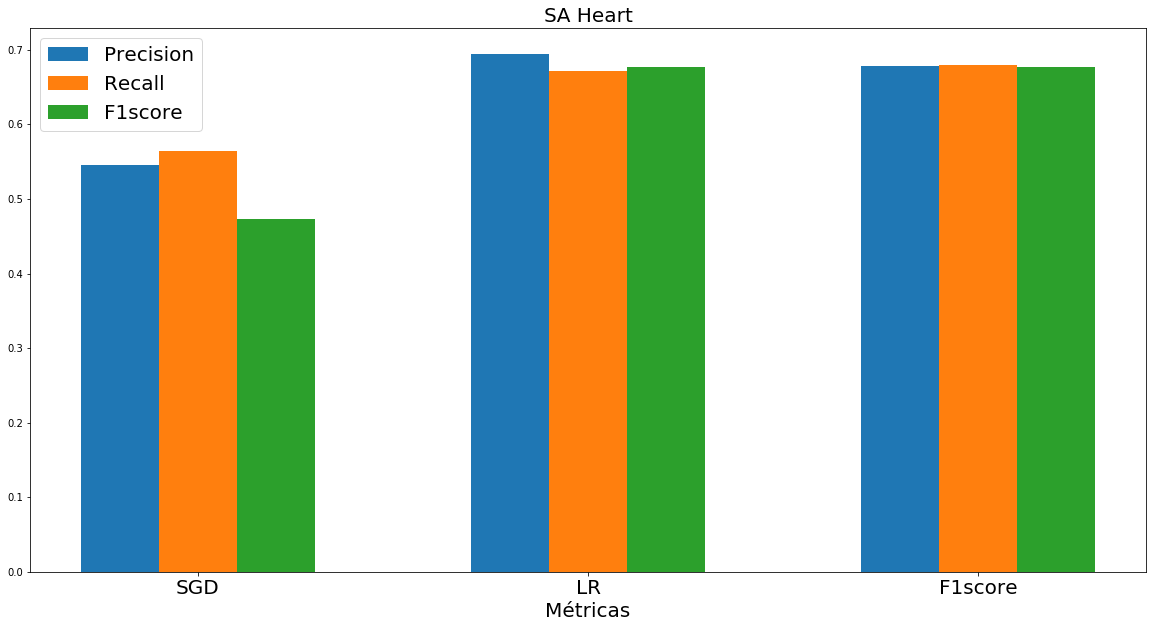

In [13]:
#fig, ax = plt.subplots()
plt.figure(figsize = (20,10))

labels = ['precision','recall','f1score']
index = np.arange(len(labels))
width = 0.2

rec1 = plt.bar(index-width, [sgd_res[0],lr_res[0],nb_res[0]], width, label = 'Precision')
rec2 = plt.bar(index, [sgd_res[1],lr_res[1],nb_res[1]], width, label = 'Recall')
rec3 = plt.bar(index+width, [sgd_res[2],lr_res[2],nb_res[2]], width, label = 'F1score')

plt.title("SA Heart", fontsize=20)
plt.xlabel('Métricas', fontsize=20)
plt.xticks(index, ('SGD', 'LR', 'F1score'),fontsize=20)
plt.legend(fontsize=20)

# PIMA Indians Diabetes 

In [14]:
df2 = pd.read_csv("./../pima-indians-diabetes.data.csv", sep=',') 
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [15]:
X = df2.drop(["Class"],axis=1)
y = df2["Class"]

In [16]:
for train_ind, test_ind in skf.split(X, y):
    X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
    y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]
    
    teste_resultados(X_train, X_test, y_train, y_test, 'sgd', sgd, sgd_info)
    teste_resultados(X_train, X_test, y_train, y_test, 'lr', lr, lr_info)
    teste_resultados(X_train, X_test, y_train, y_test, 'nb', nb, nb_info)

### Média dos resultados dos folds 

In [17]:
sgd_res = [np.mean(sgd_info['prec']), np.mean(sgd_info['recall']), np.mean(sgd_info['fscore'])]
lr_res = [np.mean(lr_info['prec']), np.mean(lr_info['recall']), np.mean(lr_info['fscore'])]
nb_res = [np.mean(nb_info['prec']), np.mean(nb_info['recall']), np.mean(nb_info['fscore'])]

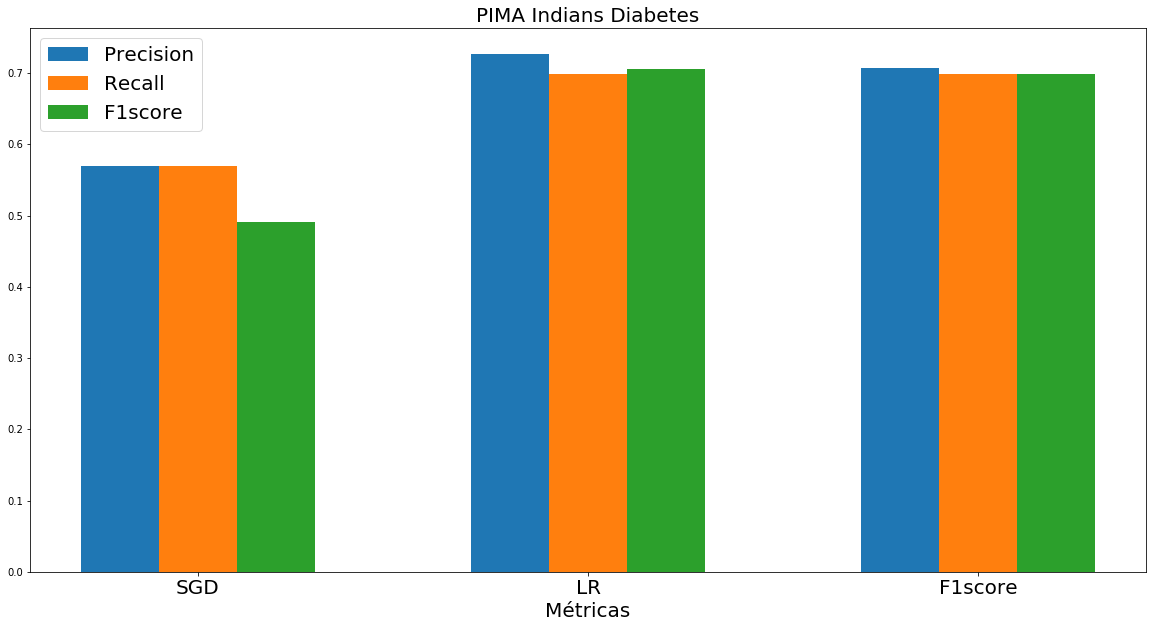

In [18]:
#fig, ax = plt.subplots()
plt.figure(figsize = (20,10))

labels = ['precision','recall','f1score']
index = np.arange(len(labels))
width = 0.2

rec1 = plt.bar(index-width, [sgd_res[0],lr_res[0],nb_res[0]], width, label = 'Precision')
rec2 = plt.bar(index, [sgd_res[1],lr_res[1],nb_res[1]], width, label = 'Recall')
rec3 = plt.bar(index+width, [sgd_res[2],lr_res[2],nb_res[2]], width, label = 'F1score')

plt.title("PIMA Indians Diabetes", fontsize=20)
plt.xlabel('Métricas', fontsize=20)
plt.xticks(index, ('SGD', 'LR', 'F1score'),fontsize=20)
plt.legend(fontsize=20)